In [1]:
#Importing required libraries and functions
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform, randint
from sklearn.metrics import precision_recall_fscore_support

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


# Loading the Dataset
* Loading train and test dataset
* Seeing if their are any NaN values in the dataset
* Dealing with the NaN values accordingly

In [2]:
# Loading the train and test dataset
train_dataset = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv")
test_dataset = pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv")
# Setting a random state to be used everywhere
RANDOM_STATE = 6443

In [3]:
# Previewing the dataset
print(train_dataset.shape)
train_dataset.head()

(13636, 15)


,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [4]:
# Previewing the test dataset
print(test_dataset.shape)
test_dataset.head()

(4546, 14)


,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,86,45,41384,Black Bean ‘n’ Pumpkin Chili,sp_aUSaElGf_41384_c_341929,u_1oKc4U6bh65cEli8Z8eTIf98Vpr,kalloween,1,1622718043,0,0,0,100,This was so good!! The pumpkin was perfect as...
1,102,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_274545,u_1oKW5seFLQMSwAeOfBVmwJizy5D,chocolate desert,1,1622717685,0,0,1,100,"So good! Could not stop eating them, so bad...."
2,156,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_398512,u_1oKZ6GUIAIol8xe6oEI7t1Mpxdz,Vantreesta,1,1622718307,0,0,0,100,I use a small ladle to fill muffin cups.
3,18,89,1324,Porcupine Meatballs,sp_aUSaElGf_1324_c_431662,u_1oKWCP33NVk4Osfpu4VJuIckEF0,Roberta L.Beauchamp,1,1622648872,0,4,3,212,I made this and followed the instructions as d...
4,27,70,32264,Easy Chicken Enchiladas,sp_aUSaElGf_32264_c_423935,u_1oKVhIJMuUlrSCVkbO1jheVTol8,fhquilting,1,1622718460,0,0,1,100,Very Good! I used corn tortillas. Used fresh...


In [5]:
# Checking for NaN values and seeing which columns have NaN values
for i in train_dataset.columns:
    print(f"{i}: {train_dataset[i].isna().unique()}")

ID: [False]
RecipeNumber: [False]
RecipeCode: [False]
RecipeName: [False]
CommentID: [False]
UserID: [False]
UserName: [False]
UserReputation: [False]
CreationTimestamp: [False]
ReplyCount: [False]
ThumbsUpCount: [False]
ThumbsDownCount: [False]
Rating: [False]
BestScore: [False]
Recipe_Review: [False  True]


In [6]:
# Recipie_Review contains rows with nan values
#print(train_dataset[train_dataset["Recipe_Review"].isna() == True])
# Since, there are only 2 rows we drop them
train_dataset = train_dataset.dropna()

In [7]:
# Confirming that nan values are removed
train_dataset["Rating"].isna().unique()

array([False])

# Data Exploration
* Checking the distribution of the **target** variable
* Visualizing categorical variables
* Visualizing Numerical Variables

In [8]:
# Checking the number of unique values in each column
for i in train_dataset.columns:
    print(f"{i}: {train_dataset[i].nunique()}")

ID: 701
RecipeNumber: 100
RecipeCode: 100
RecipeName: 100
CommentID: 13634
UserID: 10782
UserName: 10619
UserReputation: 20
CreationTimestamp: 2422
ReplyCount: 4
ThumbsUpCount: 57
ThumbsDownCount: 51
Rating: 6
BestScore: 525
Recipe_Review: 13370


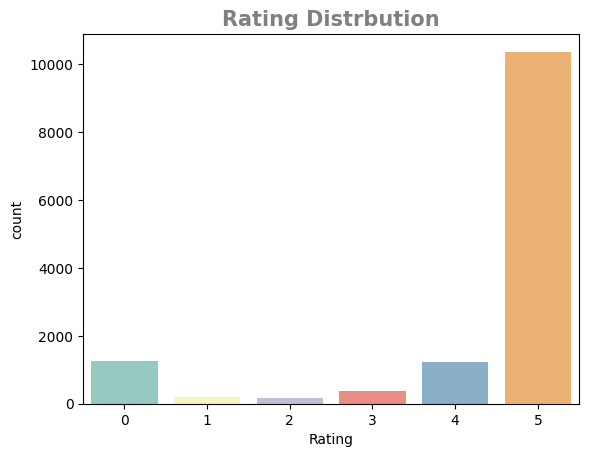

In [9]:
# Dataset is biased towards Rating 5
ax = sns.countplot(x = "Rating", data = train_dataset, palette='Set3')
ax.set_title("Rating Distrbution", fontdict={'size': 15, 'weight': 'bold', 'color': 'grey'})
plt.show()

In [10]:
# Checking the percentages
# 1 and 2 are about 1.3% each
# 0 and 4 are about 9.1% each
# 5 has the highest 76.05%
counts = train_dataset["Rating"].value_counts()
for i in range(6):
    val = 100 * counts[i]/train_dataset.shape[0]
    val = round(val, 2)
    print(f"There are {val}% target values with {i}")

There are 9.33% target values with 0
There are 1.54% target values with 1
There are 1.28% target values with 2
There are 2.7% target values with 3
There are 9.1% target values with 4
There are 76.05% target values with 5


In [11]:
# Firstly we see that RecipeNumber, RecipeCode, and RecipeName seem to be similar
# We see their is only possibility for RecipeCode and RecipeName for every RecipeNumber
# We choose to drop RecipeCode
# We keep RecipeNumber as some recipes can get more rating than others
# We add RecipeName to Recipe_review to add more textual for the Vectorizer
flag = True
for i in train_dataset["RecipeNumber"]:
    test = len(train_dataset["RecipeCode"][train_dataset["RecipeNumber"] == i].unique())
    test2 = len(train_dataset["RecipeName"][train_dataset["RecipeNumber"] == i].unique())
    if test != 1 or test2 != 1:
        flag = False
        print(f"{i} has more than one value")
if flag: print("Everything matches")

Everything matches


In [12]:
# CommentID is unique for every row and can be dropped
# UserID and UserName also seem to be similar
# Since each user has multiple IDs, it would be better to drop UserID column
# and keep UserName column. As it can be used in case some users always give a
# higher rating
flag = True
for i in train_dataset["UserName"]:
    test = train_dataset["UserID"][train_dataset["UserName"] == i].unique()
    if len(test) != 1:
        flag = False
        #print(f"{i} has more than one value, they are {test}")
if flag: 
    print("Everything matches")
else:
    print("Users seem to have multiple UserIDs")

Users seem to have multiple UserIDs


{5: [60, 510, 110, 130, 150, 300], 4: [160, 220]}


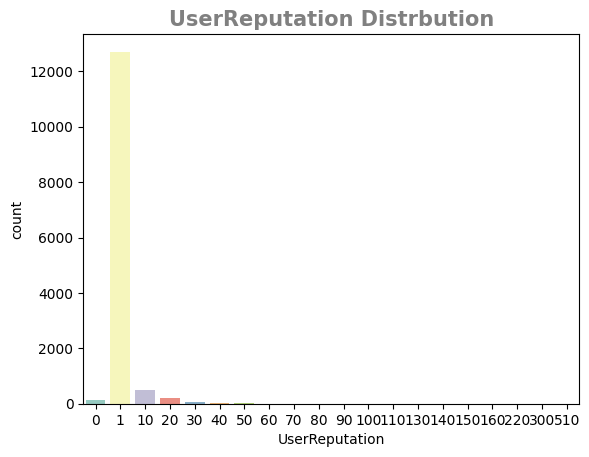

In [13]:
# UserReputation has 20 unique values
# Based on the count plot it is biased towards a reputation of 1
reputations = train_dataset["UserReputation"].unique()
merge = {}
for i in reputations:
    val = train_dataset['Rating'][train_dataset['UserReputation'] == i].unique()
    if len(val) == 1:
        if val[0] not in merge: merge[val[0]] = []
        merge[val[0]].append(i)
print(merge)
# Some Reputations only correspond to a single rating, we can merge them
# Specifically, we can merge 60, 510, 110, 130, 150, 300 into a single label
# and 160, 220 into a single label
ax = sns.countplot(x = "UserReputation", data = train_dataset, palette = 'Set3')
ax.set_title("UserReputation Distrbution", fontdict={'size': 15, 'weight': 'bold', 'color': 'grey'})
plt.show()

0: [5 3 4 0 2 1]
1: [0 4 5 1 2 3]
2: [3 4 5 0]
3: [0 5 2]


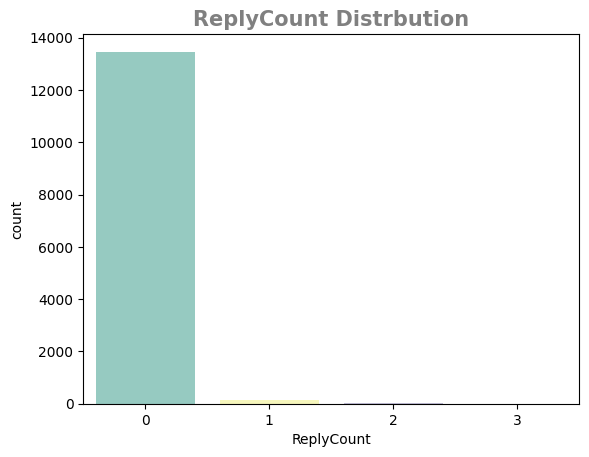

In [14]:
# ReplyCount is heavily biased towards 0, with very low values for others
replys = train_dataset["ReplyCount"].unique()
for i in replys:
    val = train_dataset['Rating'][train_dataset['ReplyCount'] == i].unique()
    print(f"{i}: {val}")
ax = sns.countplot(x = "ReplyCount", data = train_dataset, palette='Set3')
ax.set_title("ReplyCount Distrbution", fontdict={'size': 15, 'weight': 'bold', 'color': 'grey'})
plt.show()

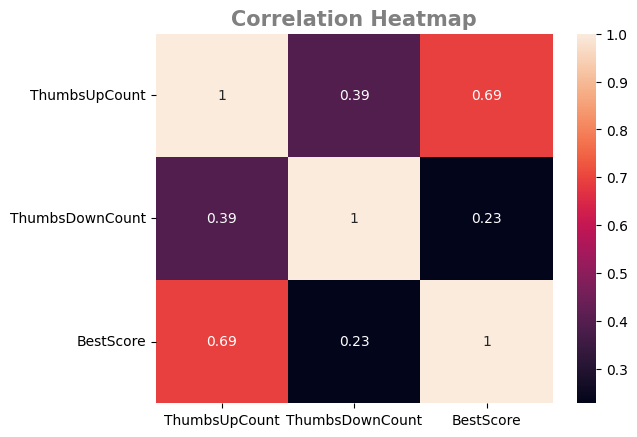

In [15]:
# Checking the correlation table to gain more insights
# Both ThumbUp and ThumbsDown seem to be correlated to BestScore
# Most probably some combination of both is being used to calculate BestScore
numerical = ["ThumbsUpCount", "ThumbsDownCount", "BestScore"]
ax = sns.heatmap(train_dataset[numerical].corr(), annot = True)
ax.set_title("Correlation Heatmap", fontdict={'size': 15, 'weight': 'bold', 'color': 'grey'})
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


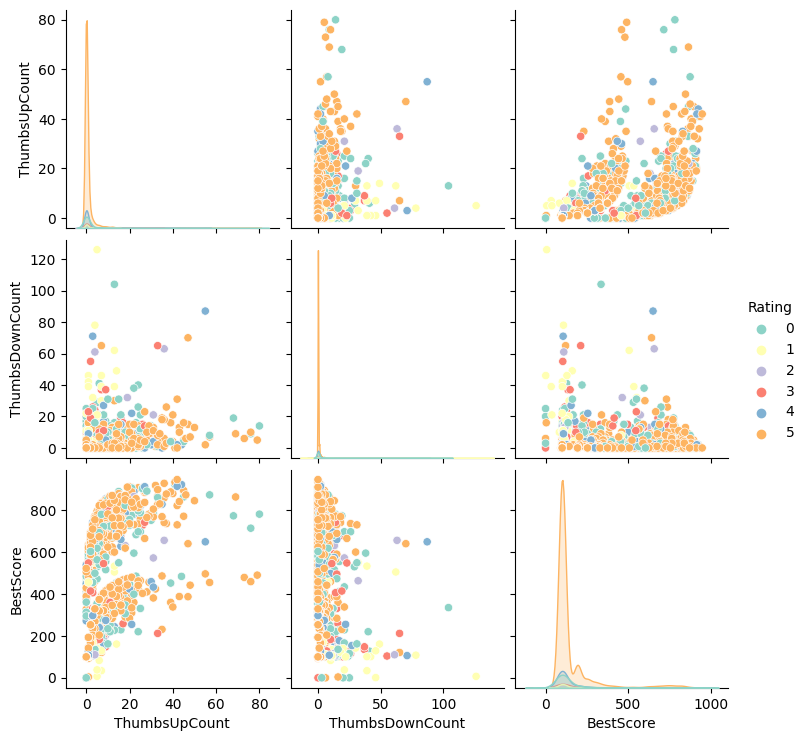

In [16]:
# Making pairplot with different numerical variables to see how they are distributed and to see how they could be related
ax = sns.pairplot(train_dataset, hue = "Rating", vars = numerical, palette = 'Set3')
plt.show()

# Result from EDA
* **RecipeNumer, RecipieCode, RecipieName** follow the same pattern only 1 needed
* We pick **RecipeNumber** as it represents the ranking of the recipies on the top 100 recipies list, we take it as a numerical variable.
* We also take **RecipeName**, but we merge it with **Recipe_review** to give it more textual data.
* As there are only 20 values in **UserReputation**, we consider it to be categorical variable, we also merge few categories into one as they correspond to only one **Rating**
* **ReplyCount** also only has 4 values, we take it as categorical variable
* **BestScore** contains the ranking of the comments, we take it as numerical variable as there are 525 unique values.
* **Recipie_Review** we take as text data and perform sentiment analysis on it.
* **CommentID** has no patterns as such it does not give any information
* **UserID** and **UserName** also has no benefit as they just specify which user wrote the comment, but we may be able to use **UserName**.
* **ThumbsUpCount** and **ThumbsDownCount** will be taken as numerical variable.

# Feature Extraction
* Dropping unecessary columns
* Merging columns
* Splitting into train and test data

In [17]:
# Downsampling and Upsampling to try and reduce imbalance
# There are two ways to upsample data, either copy rows or create synthetic data using SMOTE
# We will first be testing by copying rows
#resampled_data = train_dataset.copy()
FACTOR = 3
rating_0 = train_dataset[train_dataset["Rating"] == 0]
rating_1 = train_dataset[train_dataset["Rating"] == 1]
# Increasing 1,2,3 by a factor of 5
rating_1_up = resample(rating_1, replace=True, n_samples= int(FACTOR * rating_1.shape[0]), random_state = RANDOM_STATE)
rating_2 = train_dataset[train_dataset["Rating"] == 2]
rating_2_up = resample(rating_2, replace=True, n_samples= int(FACTOR * rating_2.shape[0]), random_state = RANDOM_STATE)
rating_3 = train_dataset[train_dataset["Rating"] == 3]
rating_3_up = resample(rating_3, replace=True, n_samples= int(FACTOR * rating_3.shape[0]), random_state = RANDOM_STATE)
rating_4 = train_dataset[train_dataset["Rating"] == 4]
rating_5 = train_dataset[train_dataset["Rating"] == 5]
# Decreasing 5 by a factor of 5
rating_5_down = resample(rating_5, n_samples = int(rating_5.shape[0] / FACTOR), random_state = RANDOM_STATE)
resampled_data = pd.concat([rating_0, rating_1_up, rating_2_up, rating_3_up, rating_4, rating_5_down])

In [18]:
# Instead of downsampling and oversamplung, we can try to make two different models
# One which classifies rating into 5 and not 5
# and another which classifies 0, 1, 2, 3, 4
rating_5 = train_dataset[train_dataset["Rating"] == 5]
rating_not5 = train_dataset[train_dataset["Rating"] != 5]
rating_5 = rating_5.assign(Rating = 1)
rating_alt = rating_not5.assign(Rating = 0)
train_model1 = pd.concat([rating_5, rating_alt])
train_model2 = rating_not5.copy()
X1 = train_model1.drop("Rating", axis = 1)
y1 = train_model1["Rating"]
X2 = train_model2.drop("Rating", axis = 1)
y2 = train_model2["Rating"]

In [19]:
# Splitting train dataset into X and y
#X = train_dataset.drop("Rating", axis = 1)
#y = train_dataset["Rating"]
X = resampled_data.drop("Rating", axis = 1)
y = resampled_data["Rating"]

In [20]:
# Dropping columns, and merging columns
X["Recipe_Review"] = X["RecipeName"] + ". " + X["Recipe_Review"]
remove = ["ID", "CommentID", "UserID", "UserName", "CreationTimestamp", "RecipeCode", "RecipeName"]
X = X.drop(remove, axis = 1)
X.head()

,RecipeNumber,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
10,86,1,0,3,10,136,First-Place Coconut Macaroons. I made this. .....
17,67,1,0,1,0,193,Chicken Wild Rice Soup. I&#39;m going to try t...
20,1,1,0,0,0,100,Creamy White Chili. I omitted the green chilis...
23,63,1,0,23,0,485,"Chicken and Dumplings. At end of instructions,..."
24,89,1,0,0,0,100,Porcupine Meatballs. I make them all the time ...


In [21]:
# Performing the same transformations for X1 and X2
X1["Recipe_Review"] = X1["RecipeName"] + ". " + X1["Recipe_Review"]
X1 = X1.drop(remove, axis = 1)
X2["Recipe_Review"] = X2["RecipeName"] + ". " + X2["Recipe_Review"]
X2 = X2.drop(remove, axis = 1)

In [22]:
# Merging a few categories of UserReputation
five = [510, 110, 130, 150, 300]
five_change = 60
four = [220]
four_change = 160
user_rep = X["UserReputation"].values
for i in range(len(user_rep)):
    if user_rep[i] in five:
        user_rep[i] = five_change
    elif user_rep[i] in four:
        user_rep[i] = four_change
X.loc[:, "UserReputation"] = user_rep

In [23]:
# Merging a few categories of UserReputation
five = [510, 110, 130, 150, 300]
five_change = 60
four = [220]
four_change = 160
user_rep = X1["UserReputation"].values
for i in range(len(user_rep)):
    if user_rep[i] in five:
        user_rep[i] = five_change
    elif user_rep[i] in four:
        user_rep[i] = four_change
X1.loc[:, "UserReputation"] = user_rep
user_rep = X2["UserReputation"].values
for i in range(len(user_rep)):
    if user_rep[i] in five:
        user_rep[i] = five_change
    elif user_rep[i] in four:
        user_rep[i] = four_change
X2.loc[:, "UserReputation"] = user_rep

In [24]:
# Performing same operations on test_dataset so we don't have to do it again
test_dataset["Recipe_Review"] = test_dataset["RecipeName"] + ". " + test_dataset["Recipe_Review"]
test_dataset = test_dataset.drop(remove, axis = 1)
test_dataset.head()

,RecipeNumber,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,45,1,0,0,0,100,Black Bean ‘n’ Pumpkin Chili. This was so good...
1,53,1,0,0,1,100,Pumpkin Bars. So good! Could not stop eating...
2,53,1,0,0,0,100,Pumpkin Bars. I use a small ladle to fill muff...
3,89,1,0,4,3,212,Porcupine Meatballs. I made this and followed ...
4,70,1,0,0,1,100,Easy Chicken Enchiladas. Very Good! I used co...


In [25]:
# Changing the same categories of UserReputation in test dataset
five = [510, 110, 130, 150, 300]
five_change = 60
four = [220]
four_change = 160
user_rep = test_dataset["UserReputation"].values
for i in range(len(user_rep)):
    if user_rep[i] in five:
        user_rep[i] = five_change
    elif user_rep[i] in four:
        user_rep[i] = four_change
test_dataset.loc[:, "UserReputation"] = user_rep

In [26]:
# Performing a train test split using stratify, such that we have equal representation
# of all Ratings in both train and test
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = RANDOM_STATE)
trainX1, testX1, trainY1, testY1 = train_test_split(X1, y1, test_size = 0.1, stratify = y1, random_state = RANDOM_STATE)
trainX2, testX2, trainY2, testY2 = train_test_split(X2, y2, test_size = 0.1, stratify = y2, random_state = RANDOM_STATE)

In [27]:
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)
print(trainX1.shape, trainY1.shape)
print(testX1.shape, testY1.shape)
print(trainX2.shape, trainY2.shape)
print(testX2.shape, testY2.shape)

(7402, 7) (7402,)
(823, 7) (823,)
(12270, 7) (12270,)
(1364, 7) (1364,)
(2938, 7) (2938,)
(327, 7) (327,)


# Defining Models and Pipelines
* Define Transformers and Pipelines
* Add Classifier to the pipeline
* Define hyperparameters to search for in Cross Validation

In [28]:
# Defining Transformers for every type of variable
# and merging them into a single Pipeline
numeric_features = ["RecipeNumber", "BestScore", "ThumbsUpCount", "ThumbsDownCount"]
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

categorical_features = ["UserReputation", "ReplyCount"]
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        #("selector", SelectPercentile(chi2, percentile=80)),
    ]
)

text_features = "Recipe_Review"
text_transformer = Pipeline(
steps=[#("text_preprocess", CountVectorizer()),
       ('tfidf', TfidfVectorizer(use_idf = True, stop_words = 'english')),
      ])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ("text", text_transformer, text_features),
    ]
)

In [29]:
# Adding different Classifiers at the end of Preprocess pipeline
log_pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ("log", LogisticRegression(solver = 'liblinear', class_weight="balanced", random_state = RANDOM_STATE))]
)
random_forest_pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ("rfr", RandomForestClassifier(class_weight="balanced", random_state = RANDOM_STATE))]
)
SVM_pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ("svm", SVC(class_weight="balanced", random_state = RANDOM_STATE))]
)
KNN_pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ("knn", KNeighborsClassifier())]
)
AdaBoost_pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ("ada", AdaBoostClassifier(DecisionTreeClassifier(max_depth = 100, class_weight="balanced", random_state = RANDOM_STATE)))]
)
BlanBag_pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ("blb", BalancedBaggingClassifier(estimator=DecisionTreeClassifier(random_state = RANDOM_STATE), sampling_strategy='not majority',replacement=False, random_state = RANDOM_STATE))]
)
MLP_pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ("mlp", MLPClassifier(random_state = RANDOM_STATE))]
)
models = [log_pipeline, random_forest_pipeline, SVM_pipeline, KNN_pipeline, AdaBoost_pipeline, BlanBag_pipeline, MLP_pipeline]
model_name = ["LogReg", "RandForest", "SVM", "KNN", "AdaBoost", "BalBag", "MLP"]

In [30]:
# Training Base models and comparing their performace
acc = []
prec = []
f1_score = []
for i in range(len(models)):
    models[i].fit(trainX, trainY)
    acc.append(models[i].score(testX, testY))
    preds = models[i].predict(testX)
    p, _, f1, _ = precision_recall_fscore_support(testY, preds, average = "weighted")
    prec.append(p)
    f1_score.append(f1)
    print(f"{model_name[i]}, Accuracy: {acc[i]:.2f}, Precision: {prec[i]:.2f}, F1 Score:{f1_score[i]:.2f}")

LogReg, Accuracy: 0.67, Precision: 0.65, F1 Score:0.66
RandForest, Accuracy: 0.72, Precision: 0.74, F1 Score:0.68
SVM, Accuracy: 0.58, Precision: 0.63, F1 Score:0.60
KNN, Accuracy: 0.53, Precision: 0.50, F1 Score:0.50
AdaBoost, Accuracy: 0.71, Precision: 0.70, F1 Score:0.69
BalBag, Accuracy: 0.68, Precision: 0.66, F1 Score:0.61
MLP, Accuracy: 0.69, Precision: 0.67, F1 Score:0.68


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.67 0.72 0.58 0.53 0.71 0.68 0.69]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


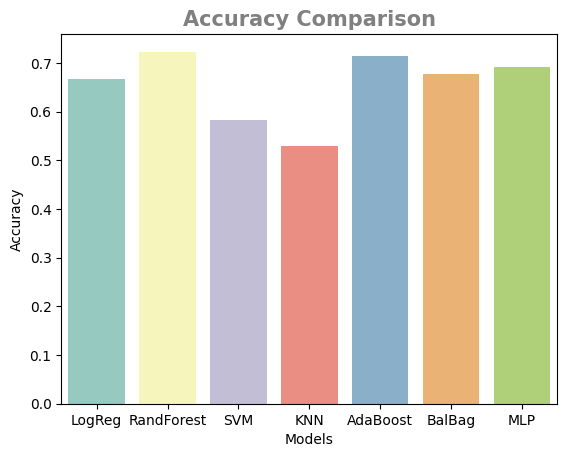

In [31]:
# Comparing Accuracy of all models
print(np.round(acc, 2))
ax = sns.barplot(x = model_name, y = acc, palette = "Set3")
ax.set(xlabel = "Models", ylabel = "Accuracy")
ax.set_title("Accuracy Comparison", fontdict={'size': 15, 'weight': 'bold', 'color': 'grey'})
plt.show()

[0.65 0.74 0.63 0.5  0.7  0.66 0.67]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


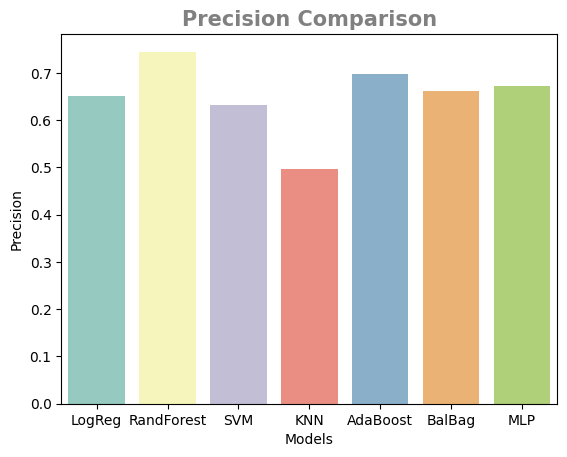

In [32]:
# Comparing Precision of different models
print(np.round(prec,2))
ax = sns.barplot(x = model_name, y = prec, palette = "Set3")
ax.set(xlabel = "Models", ylabel = "Precision")
ax.set_title("Precision Comparison", fontdict={'size': 15, 'weight': 'bold', 'color': 'grey'})
plt.show()

[0.66 0.68 0.6  0.5  0.69 0.61 0.68]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


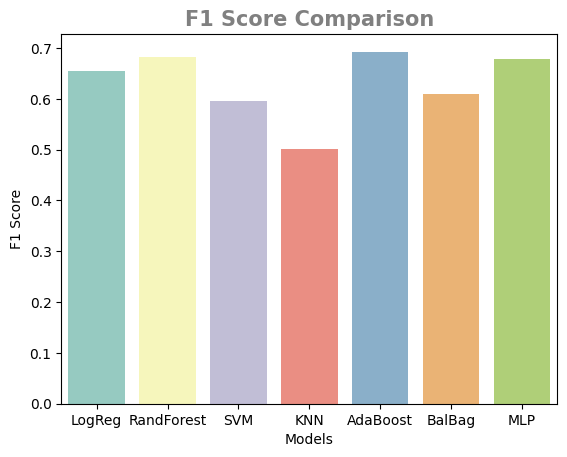

In [33]:
# Comparing F1 Score for all models
print(np.round(f1_score,2))
ax = sns.barplot(x = model_name, y = f1_score, palette = "Set3")
ax.set(xlabel = "Models", ylabel = "F1 Score")
ax.set_title("F1 Score Comparison", fontdict={'size': 15, 'weight': 'bold', 'color': 'grey'})
plt.show()

# Base Model Comparison
Since, Random Forest, AdaBoost, Balanced Bagging and Multi Layered Perceptron seem to work best for all metrics we will tune their hyperparameters

In [34]:
# Making dictionaries for hyperparameter tuning
#tfidf = {'preprocessor__text__tfidf__ngram_range': [(1,1), (1,2)], 'preprocessor__text__tfidf__stop_words': [None, 'english'], 'preprocessor__text__tfidf__use_idf': [True, False]}
#rand_log = {'log__penalty': ["l1", "l2"], 'log__C': uniform(loc=0, scale=4), "log__max_iter": randint(low = 100, high = 3000)}
#rand_svm = {'svm__C': uniform(loc = 0, scale = 4), 'svm__gamma': ['scale','auto'], 'svm__tol': uniform(loc = 1e-5, scale = 1e-3), 'svm__degree': [3, 4, 5]}
#rand_knn = {'knn__n_neighbors': randint(low = 1, high = 1000)}
#rand_search_log = RandomizedSearchCV(log_pipeline, rand_log, refit = True, verbose = 1, n_jobs = -1)
#rand_search_svm = RandomizedSearchCV(SVM_pipeline, rand_svm, refit = True, verbose = 1, n_jobs = -1)
#rand_search_knn = RandomizedSearchCV(KNN_pipeline, rand_knn, refit = True, verbose = 1, n_jobs = -1)
rand_forest = {'rfr__n_estimators': randint(low = 10, high = 200), 'rfr__criterion':["gini", "entropy","log_loss"], 'rfr__max_depth': randint(low = 1, high = 100)}
rand_ada = {'ada__n_estimators': randint(low = 50, high = 150), 'ada__learning_rate': uniform()}
rand_blb = {'blb__n_estimators': randint(low = 50, high = 150), 'blb__max_samples': uniform(), 'blb__max_features':uniform()}
rand_mlp = {'mlp__hidden_layer_sizes': [[100,50,30], [80,40,20]], 'mlp__activation': ['identity', 'logistic', 'tanh', 'relu'], 'mlp__learning_rate':['constant', 'invscaling', 'adaptive'], 'mlp__max_iter': randint(100,4000), 'mlp__learning_rate_init':uniform(loc = 0.0001, scale = 0.01)}

rand_search_rfr = RandomizedSearchCV(random_forest_pipeline, rand_forest, refit = True, verbose = 1, n_jobs = -1, random_state = RANDOM_STATE)
rand_search_ada = RandomizedSearchCV(AdaBoost_pipeline, rand_ada, refit = True, verbose = 1, n_jobs = -1, random_state = RANDOM_STATE)
rand_search_blb = RandomizedSearchCV(BlanBag_pipeline, rand_blb, refit = True, verbose = 1, n_jobs = -1, random_state = RANDOM_STATE)
rand_search_mlp = RandomizedSearchCV(MLP_pipeline, rand_mlp, refit = True, verbose = 1, n_jobs = -1, random_state = RANDOM_STATE)
model_name = ["RandForest", "AdaBoost", "BalBag", "MLP"]
acc = []
prec = []
f1_score = []

# Training Models
* Random Forest Classifier
* AdaBoost Classifier
* BalancedBagging Classifier
* MLP Classifier

In [35]:
#This is the Dummy Classifier
#dummy = DummyClassifier()
#dummy.fit(train_dataset.drop("Rating", axis = 1), train_dataset["Rating"])
#result = dummy.predict(test_dataset)

In [36]:
# Performing Random Search with Logistic Regression
#rand_search_log.fit(trainX, trainY)
#print("model score: %.3f" % rand_search_log.score(testX, testY))
#print(rand_search_log.best_params_)
# Fitting 5 folds for each of 10 candidates, totalling 50 fits
# model score: 0.708
#{'log__C': 3.423475552794303, 'log__max_iter': 1014, 'log__penalty': 'l2'}

In [37]:
# Performing Random Search with SVM Classifier
#rand_search_svm.fit(trainX, trainY)
#print("model score: %.3f" % rand_search_svm.score(testX, testY))
#print(rand_search_svm.best_params_)
# Fitting 5 folds for each of 10 candidates, totalling 50 fits
# model score: 0.678
#{'svm__C': 3.698170133401691, 'svm__degree': 4, 'svm__gamma': 'scale', 'svm__tol': 0.0008850143687158826}

In [38]:
# Performing Random Search with KNN Classifier
#rand_search_knn.fit(trainX, trainY)
#print("model score: %.3f" % rand_search_knn.score(testX, testY))
#print(rand_search_knn.best_params_)
# Fitting 5 folds for each of 10 candidates, totalling 50 fits
# model score: 0.544
#{'knn__n_neighbors': 16}

In [39]:
# Performing Random Search with Random Forest Classifier
rand_search_rfr.fit(trainX, trainY)
acc.append(rand_search_rfr.score(testX, testY))
preds = rand_search_rfr.predict(testX)
p, _, f1, _ = precision_recall_fscore_support(testY, preds, average = "weighted")
prec.append(p)
f1_score.append(f1)
print(f"{model_name[0]}, Accuracy: {acc[-1]:.2f}, Precision: {prec[-1]:.2f}, F1 Score:{f1_score[-1]:.2f}")
print(rand_search_rfr.best_params_)
# Fitting 5 folds for each of 10 candidates, totalling 50 fits
# RandForest, Accuracy: 0.74, Precision: 0.83, F1 Score:0.75
#{'rfr__criterion': 'gini', 'rfr__max_depth': 75, 'rfr__n_estimators': 163}

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


RandForest, Accuracy: 0.74, Precision: 0.75, F1 Score:0.72
{'rfr__criterion': 'gini', 'rfr__max_depth': 75, 'rfr__n_estimators': 163}


In [40]:
# Performing Random Search with AdaBoost Classifier
rand_search_ada.fit(trainX, trainY)
acc.append(rand_search_ada.score(testX, testY))
preds = rand_search_ada.predict(testX)
p, _, f1, _ = precision_recall_fscore_support(testY, preds, average = "weighted")
prec.append(p)
f1_score.append(f1)
print(f"{model_name[1]}, Accuracy: {acc[-1]:.2f}, Precision: {prec[-1]:.2f}, F1 Score:{f1_score[-1]:.2f}")
print(rand_search_ada.best_params_)
# Fitting 5 folds for each of 10 candidates, totalling 50 fits
# AdaBoost, Accuracy: 0.72, Precision: 0.78, F1 Score:0.73
#{'ada__learning_rate': 0.7856086427271983, 'ada__n_estimators': 59}

Fitting 5 folds for each of 10 candidates, totalling 50 fits
AdaBoost, Accuracy: 0.71, Precision: 0.69, F1 Score:0.69
{'ada__learning_rate': 0.8563404676678662, 'ada__n_estimators': 91}


In [41]:
# Performing Random Search with BalancedBagging Classifier
rand_search_blb.fit(trainX, trainY)
acc.append(rand_search_blb.score(testX, testY))
preds = rand_search_blb.predict(testX)
p, _, f1, _ = precision_recall_fscore_support(testY, preds, average = "weighted")
prec.append(p)
f1_score.append(f1)
print(f"{model_name[2]}, Accuracy: {acc[-1]:.2f}, Precision: {prec[-1]:.2f}, F1 Score:{f1_score[-1]:.2f}")
print(rand_search_blb.best_params_)
# Fitting 5 folds for each of 10 candidates, totalling 50 fits
# BalBag, Accuracy: 0.69, Precision: 0.85, F1 Score:0.63
#{'blb__max_features': 0.6595388625674403, 'blb__max_samples': 0.905883075843612, 'blb__n_estimators': 89}

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


BalBag, Accuracy: 0.69, Precision: 0.76, F1 Score:0.60
{'blb__max_features': 0.6595388625674403, 'blb__max_samples': 0.905883075843612, 'blb__n_estimators': 89}


In [42]:
# Performing Random Search with MLP Classifier
rand_search_mlp.fit(trainX, trainY)
acc.append(rand_search_mlp.score(testX, testY))
preds = rand_search_mlp.predict(testX)
p, _, f1, _ = precision_recall_fscore_support(testY, preds, average = "weighted")
prec.append(p)
f1_score.append(f1)
print(f"{model_name[3]}, Accuracy: {acc[-1]:.2f}, Precision: {prec[-1]:.2f}, F1 Score:{f1_score[-1]:.2f}")
print(rand_search_mlp.best_params_)
# Fitting 5 folds for each of 10 candidates, totalling 50 fits
# MLP, Accuracy: 0.70, Precision: 0.71, F1 Score:0.71
#{'mlp__activation': 'relu', 'mlp__hidden_layer_sizes': [80, 40, 20], 'mlp__learning_rate': 'adaptive', 'mlp__learning_rate_init': 0.0055911194870163555, 'mlp__max_iter': 1176}

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (333) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (333) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (333) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (333) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP, Accuracy: 0.67, Precision: 0.65, F1 Score:0.66
{'mlp__activation': 'tanh', 'mlp__hidden_layer_sizes': [100, 50, 30], 'mlp__learning_rate': 'adaptive', 'mlp__learning_rate_init': 0.007554238267260179, 'mlp__max_iter': 362}


[0.74 0.71 0.69 0.67]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


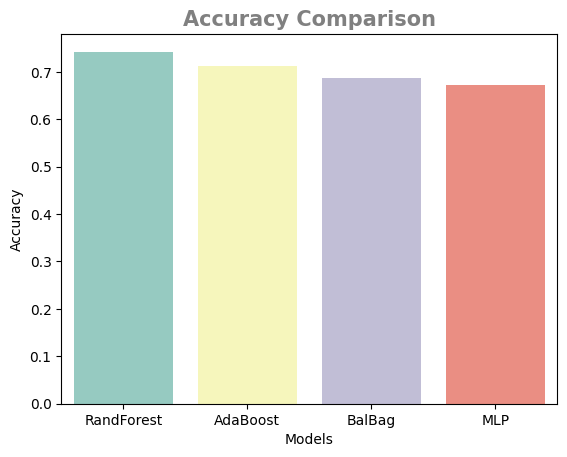

In [43]:
# Comparing Accuracy of all models
print(np.round(acc, 2))
ax = sns.barplot(x = model_name, y = acc, palette = "Set3")
ax.set(xlabel = "Models", ylabel = "Accuracy")
ax.set_title("Accuracy Comparison", fontdict={'size': 15, 'weight': 'bold', 'color': 'grey'})
plt.show()

[0.75 0.69 0.76 0.65]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


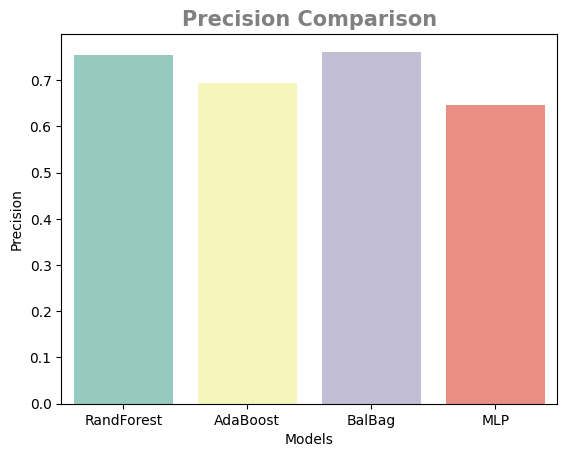

In [44]:
# Comparing Precision of different models
print(np.round(prec,2))
ax = sns.barplot(x = model_name, y = prec, palette = "Set3")
ax.set(xlabel = "Models", ylabel = "Precision")
ax.set_title("Precision Comparison", fontdict={'size': 15, 'weight': 'bold', 'color': 'grey'})
plt.show()

[0.72 0.69 0.6  0.66]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


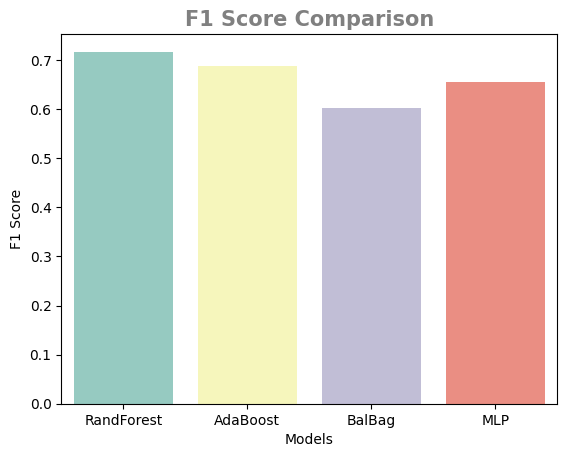

In [45]:
# Comparing F1 Score for all models
print(np.round(f1_score,2))
ax = sns.barplot(x = model_name, y = f1_score, palette = "Set3")
ax.set(xlabel = "Models", ylabel = "F1 Score")
ax.set_title("F1 Score Comparison", fontdict={'size': 15, 'weight': 'bold', 'color': 'grey'})
plt.show()

# HyperParameter Tuning
After hyperparameter tuning we see that their is some improvement but not by much<br>
Next we tried making two different models, one that classifies rating 5 vs not rating 5(Binary classification task) and the second model that classifies 0,1,2,3,4 ratings.<br>
This seems to increase the accuracy by quite a bit<br>

In [46]:
# We will be using it for both of our models
rand_search_rfr1 = RandomizedSearchCV(random_forest_pipeline, rand_forest, refit = True, verbose = 1, n_jobs = -1)
rand_search_rfr2 = RandomizedSearchCV(random_forest_pipeline, rand_forest, refit = True, verbose = 1, n_jobs = -1)

rand_search_blb1 = RandomizedSearchCV(BlanBag_pipeline, rand_blb, refit = True, verbose = 1, n_jobs = -1)
rand_search_blb2 = RandomizedSearchCV(BlanBag_pipeline, rand_blb, refit = True, verbose = 1, n_jobs = -1)

rand_search_ada1 = RandomizedSearchCV(AdaBoost_pipeline, rand_ada, refit = True, verbose = 1, n_jobs = -1)
rand_search_ada2 = RandomizedSearchCV(AdaBoost_pipeline, rand_ada, refit = True, verbose = 1, n_jobs = -1)

rand_search_mlp1 = RandomizedSearchCV(MLP_pipeline, rand_mlp, refit = True, verbose = 1, n_jobs = -1)
rand_search_mlp2 = RandomizedSearchCV(MLP_pipeline, rand_mlp, refit = True, verbose = 1, n_jobs = -1)

# Fitting all these models with modifies train and test set
acc, prec, f1_score, acc1, prec1, f1_score1 = [], [], [], [], [], []

rand_search_rfr1.fit(trainX1, trainY1)
acc.append(rand_search_rfr1.score(testX1, testY1))
preds = rand_search_rfr1.predict(testX1)
p, _, f1, _ = precision_recall_fscore_support(testY1, preds, average = "weighted")
prec.append(p)
f1_score.append(f1)
print(f"Random Forest 1, Accuracy: {acc[-1]:.2f}, Precision: {prec[-1]:.2f}, F1 Score:{f1_score[-1]:.2f}")

rand_search_rfr2.fit(trainX2, trainY2)
acc1.append(rand_search_rfr2.score(testX2, testY2))
preds = rand_search_rfr2.predict(testX2)
p, _, f1, _ = precision_recall_fscore_support(testY2, preds, average = "weighted")
prec1.append(p)
f1_score1.append(f1)
print(f"Random Forest 2, Accuracy: {acc1[-1]:.2f}, Precision: {prec1[-1]:.2f}, F1 Score:{f1_score1[-1]:.2f}")

rand_search_ada1.fit(trainX1, trainY1)
acc.append(rand_search_ada1.score(testX1, testY1))
preds = rand_search_ada1.predict(testX1)
p, _, f1, _ = precision_recall_fscore_support(testY1, preds, average = "weighted")
prec.append(p)
f1_score.append(f1)
print(f"AdaBoost 1, Accuracy: {acc[-1]:.2f}, Precision: {prec[-1]:.2f}, F1 Score:{f1_score[-1]:.2f}")

rand_search_ada2.fit(trainX2, trainY2)
acc1.append(rand_search_ada2.score(testX2, testY2))
preds = rand_search_ada2.predict(testX2)
p, _, f1, _ = precision_recall_fscore_support(testY2, preds, average = "weighted")
prec1.append(p)
f1_score1.append(f1)
print(f"AdaBoost 2, Accuracy: {acc1[-1]:.2f}, Precision: {prec1[-1]:.2f}, F1 Score:{f1_score1[-1]:.2f}")

rand_search_blb1.fit(trainX1, trainY1)
acc.append(rand_search_blb1.score(testX1, testY1))
preds = rand_search_blb1.predict(testX1)
p, _, f1, _ = precision_recall_fscore_support(testY1, preds, average = "weighted")
prec.append(p)
f1_score.append(f1)
print(f"Balanced Bagging 1, Accuracy: {acc[-1]:.2f}, Precision: {prec[-1]:.2f}, F1 Score:{f1_score[-1]:.2f}")

rand_search_blb2.fit(trainX2, trainY2)
acc1.append(rand_search_blb2.score(testX2, testY2))
preds = rand_search_blb2.predict(testX2)
p, _, f1, _ = precision_recall_fscore_support(testY2, preds, average = "weighted")
prec1.append(p)
f1_score1.append(f1)
print(f"Balanced Bagging 2, Accuracy: {acc1[-1]:.2f}, Precision: {prec1[-1]:.2f}, F1 Score:{f1_score1[-1]:.2f}")

rand_search_mlp1.fit(trainX1, trainY1)
acc.append(rand_search_mlp1.score(testX1, testY1))
preds = rand_search_mlp1.predict(testX1)
p, _, f1, _ = precision_recall_fscore_support(testY1, preds, average = "weighted")
prec.append(p)
f1_score.append(f1)
print(f"MLP 1, Accuracy: {acc[-1]:.2f}, Precision: {prec[-1]:.2f}, F1 Score:{f1_score[-1]:.2f}")

rand_search_mlp2.fit(trainX2, trainY2)
acc1.append(rand_search_mlp2.score(testX2, testY2))
preds = rand_search_mlp2.predict(testX2)
p, _, f1, _ = precision_recall_fscore_support(testY2, preds, average = "weighted")
prec1.append(p)
f1_score1.append(f1)
print(f"MLP 2, Accuracy: {acc1[-1]:.2f}, Precision: {prec1[-1]:.2f}, F1 Score:{f1_score1[-1]:.2f}")

print(rand_search_rfr1.best_params_)
print(rand_search_rfr2.best_params_)
print(rand_search_ada1.best_params_)
print(rand_search_ada2.best_params_)
print(rand_search_blb1.best_params_)
print(rand_search_blb2.best_params_)
print(rand_search_mlp1.best_params_)
print(rand_search_mlp2.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Random Forest 1, Accuracy: 0.80, Precision: 0.79, F1 Score:0.78
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest 2, Accuracy: 0.58, Precision: 0.54, F1 Score:0.52
Fitting 5 folds for each of 10 candidates, totalling 50 fits
AdaBoost 1, Accuracy: 0.78, Precision: 0.76, F1 Score:0.76
Fitting 5 folds for each of 10 candidates, totalling 50 fits
AdaBoost 2, Accuracy: 0.51, Precision: 0.49, F1 Score:0.49
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Balanced Bagging 1, Accuracy: 0.80, Precision: 0.79, F1 Score:0.76
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Balanced Bagging 2, Accuracy: 0.48, Precision: 0.44, F1 Score:0.41
Fitting 5 folds for each of 10 candidates, totalling 50 fits
MLP 1, Accuracy: 0.77, Precision: 0.76, F1 Score:0.76
Fitting 5 folds for each of 10 candidates, totalling 50 fits
MLP 2, Accuracy: 0.49, Precision: 0.49, F1 Score:0.49
{'rfr__criterion': 'log_loss', 'rfr__max_depth': 79, 'rfr__n_estimators': 144}
{'rfr__criterion': 'entropy', 'rfr__max_depth': 58, 'rfr__n_estimators': 165}
{'ada__learning_rate': 0.3508061285265429, 'ada__n_estimators': 84}
{'ada__learning_rate': 0.053754179147341485, 'ada__n_estimators': 91}
{'blb__max_features': 0.7120688399906325, 'blb__max_samples': 0.8957249814634006, 'blb__n_estimators': 118}
{'blb__max_features': 0.880336756228033, 'blb__max_samples': 0.13620402024090184, 'blb__n_estimators': 57}
{'mlp__activation': 'relu', 'mlp__hidden_layer_sizes': [80, 40, 20], 'mlp__learning_rate': 'constant', 'mlp__learning_rate_init': 0.0085963311663785, 'mlp__max_iter': 3916}
{'mlp__activation': 

[0.8  0.78 0.8  0.77]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


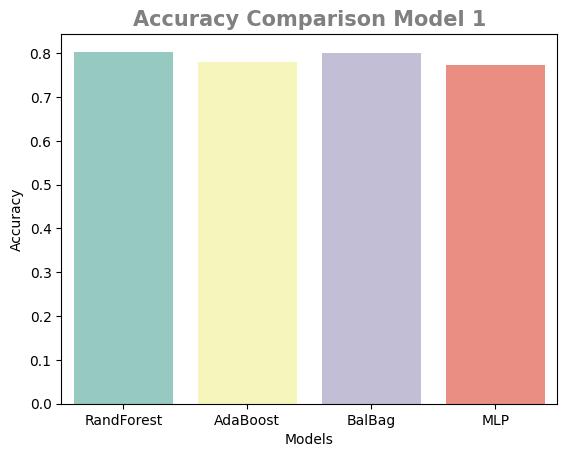

In [47]:
# Comparing Accuracy of all models
print(np.round(acc, 2))
ax = sns.barplot(x = model_name, y = acc, palette = "Set3")
ax.set(xlabel = "Models", ylabel = "Accuracy")
ax.set_title("Accuracy Comparison Model 1", fontdict={'size': 15, 'weight': 'bold', 'color': 'grey'})
plt.show()

[0.79 0.76 0.79 0.76]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


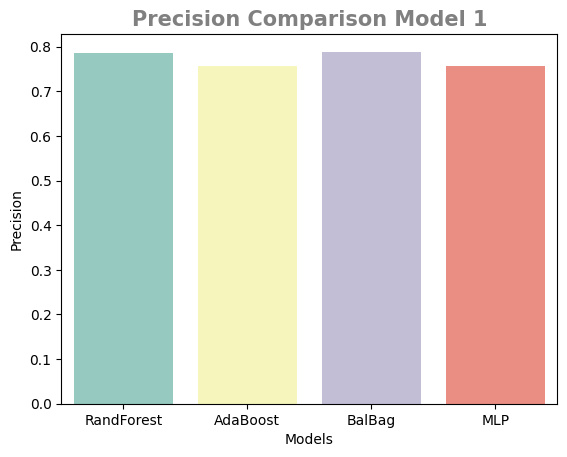

In [48]:
# Comparing Precision of different models
print(np.round(prec,2))
ax = sns.barplot(x = model_name, y = prec, palette = "Set3")
ax.set(xlabel = "Models", ylabel = "Precision")
ax.set_title("Precision Comparison Model 1", fontdict={'size': 15, 'weight': 'bold', 'color': 'grey'})
plt.show()

[0.78 0.76 0.76 0.76]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


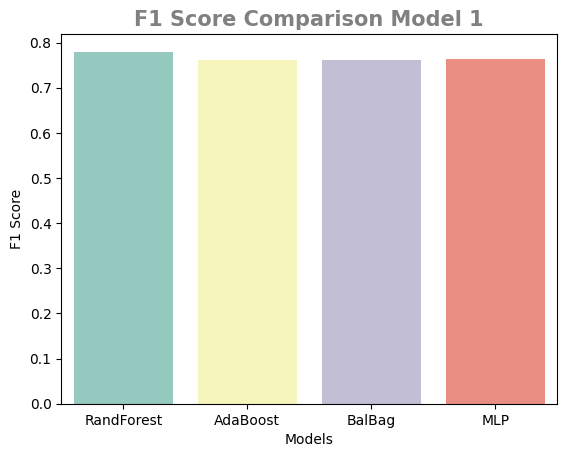

In [49]:
# Comparing F1 Score for all models
print(np.round(f1_score,2))
ax = sns.barplot(x = model_name, y = f1_score, palette = "Set3")
ax.set(xlabel = "Models", ylabel = "F1 Score")
ax.set_title("F1 Score Comparison Model 1", fontdict={'size': 15, 'weight': 'bold', 'color': 'grey'})
plt.show()

[0.58 0.51 0.48 0.49]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


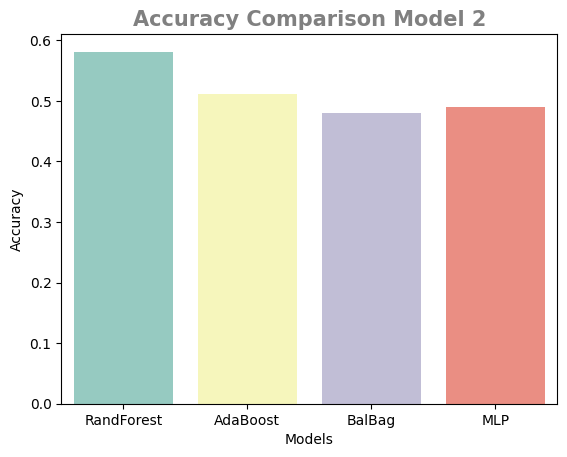

In [50]:
# Comparing Accuracy of all models
print(np.round(acc1, 2))
ax = sns.barplot(x = model_name, y = acc1, palette = "Set3")
ax.set(xlabel = "Models", ylabel = "Accuracy")
ax.set_title("Accuracy Comparison Model 2", fontdict={'size': 15, 'weight': 'bold', 'color': 'grey'})
plt.show()

[0.54 0.49 0.44 0.49]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


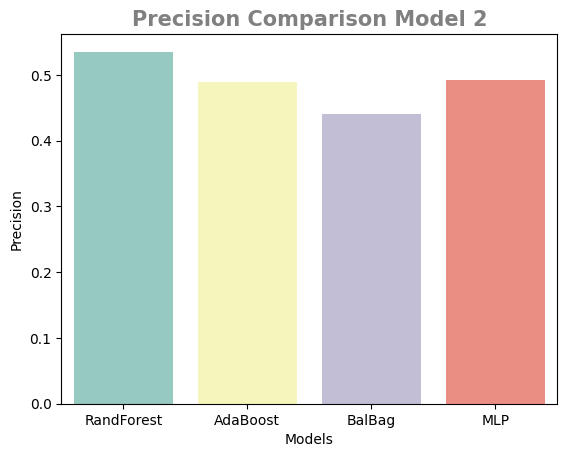

In [51]:
# Comparing Precision of different models
print(np.round(prec1,2))
ax = sns.barplot(x = model_name, y = prec1, palette = "Set3")
ax.set(xlabel = "Models", ylabel = "Precision")
ax.set_title("Precision Comparison Model 2", fontdict={'size': 15, 'weight': 'bold', 'color': 'grey'})
plt.show()

[0.52 0.49 0.41 0.49]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


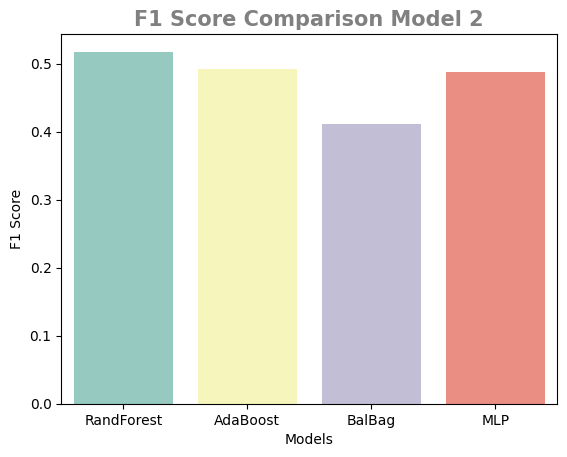

In [52]:
# Comparing F1 Score for all models
print(np.round(f1_score1,2))
ax = sns.barplot(x = model_name, y = f1_score1, palette = "Set3")
ax.set(xlabel = "Models", ylabel = "F1 Score")
ax.set_title("F1 Score Comparison Model 2", fontdict={'size': 15, 'weight': 'bold', 'color': 'grey'})
plt.show()

In [53]:
# Getting the predictions from different classifiers
#result_log = rand_search_log.predict(test_dataset)
result_rfr = rand_search_rfr.predict(test_dataset)
#result_svm = rand_search_svm.predict(test_dataset)
#result_knn = rand_search_knn.predict(test_dataset)
result_ada = rand_search_ada.predict(test_dataset)
result_blb = rand_search_blb.predict(test_dataset)
result_mlp = rand_search_mlp.predict(test_dataset)

In [54]:
# We will need to format our output a bit for the two model predictions
model_1 = [rand_search_rfr1, rand_search_ada1, rand_search_blb1, rand_search_mlp1]
model_2 = [rand_search_rfr2, rand_search_ada2, rand_search_blb2, rand_search_mlp2]
model_results = {}

for i in range(len(model_1)):
    result_1_model = model_1[i].predict(test_dataset)
    index = []
    name = model_name[i]
    for i in range(len(result_1_model)):
        if result_1_model[i] == 1:
            result_1_model[i] = 5
        else:
            index.append(i)
    rest = test_dataset.iloc[index]
    for j in range(len(model_2)):
        name1 = name + "_" + model_name[j]
        result_2_model = model_2[j].predict(rest)
        for i in range(len(result_2_model)):
            result_1_model[index[i]] = result_2_model[i]
        model_results[name1] = result_1_model

for key in model_results.keys():
    print(f"{key}: {model_results[key]}")

RandForest_RandForest: [5 5 4 ... 5 2 5]
RandForest_AdaBoost: [5 5 4 ... 5 2 5]
RandForest_BalBag: [5 5 4 ... 5 2 5]
RandForest_MLP: [5 5 4 ... 5 2 5]
AdaBoost_RandForest: [5 5 5 ... 4 2 5]
AdaBoost_AdaBoost: [5 5 5 ... 4 2 5]
AdaBoost_BalBag: [5 5 5 ... 4 2 5]
AdaBoost_MLP: [5 5 5 ... 4 2 5]
BalBag_RandForest: [5 5 5 ... 5 2 5]
BalBag_AdaBoost: [5 5 5 ... 5 2 5]
BalBag_BalBag: [5 5 5 ... 5 2 5]
BalBag_MLP: [5 5 5 ... 5 2 5]
MLP_RandForest: [0 4 5 ... 5 2 5]
MLP_AdaBoost: [0 4 5 ... 5 2 5]
MLP_BalBag: [0 4 5 ... 5 2 5]
MLP_MLP: [0 4 5 ... 5 2 5]


In [55]:
#print(result_log)
print(result_rfr)
#print(result_svm)
#print(result_knn)
print(result_ada)
print(result_blb)
print(result_mlp)

[5 5 0 ... 5 1 5]
[5 5 0 ... 0 2 4]
[5 5 5 ... 5 1 5]
[5 4 4 ... 5 2 1]


In [56]:
# Exporting results to a csv file
#submission = pd.DataFrame({"ID": range(1,test_dataset.shape[0]+1), "Rating":result_log})
#submission.to_csv("submission_log.csv", index=False)

submission = pd.DataFrame({"ID": range(1,test_dataset.shape[0]+1), "Rating":result_rfr})
submission.to_csv("submission_rfr.csv", index=False)

#submission = pd.DataFrame({"ID": range(1,test_dataset.shape[0]+1), "Rating":result_svm})
#submission.to_csv("submission_svm.csv", index=False)

#submission = pd.DataFrame({"ID": range(1,test_dataset.shape[0]+1), "Rating":result_knn})
#submission.to_csv("submission_knn.csv", index=False)

submission = pd.DataFrame({"ID": range(1,test_dataset.shape[0]+1), "Rating":result_ada})
submission.to_csv("submission_ada.csv", index=False)

submission = pd.DataFrame({"ID": range(1,test_dataset.shape[0]+1), "Rating":result_blb})
submission.to_csv("submission_blb.csv", index=False)

submission = pd.DataFrame({"ID": range(1,test_dataset.shape[0]+1), "Rating":result_mlp})
submission.to_csv("submission_mlp.csv", index=False)

# Exporting all results
for key in model_results.keys():
    submission = pd.DataFrame({"ID": range(1,test_dataset.shape[0]+1), "Rating":model_results[key]})
    submission.to_csv(f"submission_{key}.csv", index=False)